In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path
#import seaborn as sns
import matplotlib._color_data as mcd
import pyarrow.parquet as pq
import pyarrow as pa
import click
import pathlib

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.backends.backend_pdf import PdfPages
n_Icomp = 3

sys.path.insert(1, os.path.join(sys.path[0], '..'))

from COVIDScenarioPipeline.SEIR.utils import config
import COVIDScenarioPipeline.SEIR.setup as setup
import COVIDScenarioPipeline.SEIR.NPI as NPI
import COVIDScenarioPipeline.SEIR.seir as seir

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

config.set_file('config.yml')
spatial_config = config["spatial_setup"]
spatial_base_path = pathlib.Path(spatial_config["base_path"].get())
scenario = 'Scenario1'
nsim = 10
interactive = False
write_csv = False
write_parquet = True
index = 1

s = setup.Setup(setup_name=config["name"].get() + "_" + str(scenario),
                        spatial_setup=setup.SpatialSetup(
                            setup_name=spatial_config["setup_name"].get(),
                            geodata_file=spatial_base_path / spatial_config["geodata"].get(),
                            mobility_file=spatial_base_path / spatial_config["mobility"].get(),
                            popnodes_key=spatial_config["popnodes"].get(),
                            nodenames_key=spatial_config["nodenames"].get()
                        ),
                        nsim=nsim,
                        npi_scenario=scenario,
                        npi_config=config["interventions"]["settings"][scenario],
                        seeding_config=config["seeding"],
                        ti=config["start_date"].as_date(),
                        tf=config["end_date"].as_date(),
                        interactive=interactive,
                        write_csv=write_csv,
                        write_parquet=write_parquet,
                        dt=config["dt"].as_number(),
                        first_sim_index = index)

Mobility files as matrices are not recommended. Please switch soon to long form csv files.


In [2]:
sim_id_str = '0000001111'
p_draw = setup.parameters_quick_draw(config["seir"]["parameters"], len(s.t_inter), s.nnodes)
setup.parameters_write(p_draw, f"{s.paramdir}{sim_id_str}.spar", "parquet")

fname = f"{s.paramdir}{sim_id_str}.spar"
extension = 'parquet'
pars = setup.parameters_load(fname, extension, len(s.t_inter), s.nnodes)

for i in range(4):
    print((pars[i] == p_draw[i]).all())

AttributeError: module 'COVIDScenarioPipeline.SEIR.setup' has no attribute 'parameters_load'

In [3]:
sim_id_str = '00000001'
p_draw = setup.parameters_quick_draw(config["seir"]["parameters"], len(s.t_inter), s.nnodes)
setup.parameters_write(p_draw, f"{s.paramdir}{sim_id_str}.spar", "parquet")

fname = f"{s.paramdir}{sim_id_str}.spar"
extension = 'parquet'
pars = setup.parameters_load(fname, extension, len(s.t_inter), s.nnodes)

for i in range(4):
    print((pars[i] == p_draw[i]).all())

True
True
True
True


In [7]:
 seeding = pd.read_csv(f'importation/minimal/importation_000000001.csv',
                        converters={'place': lambda x: str(x)},
                     parse_dates=['date'])

In [12]:
seeding.columns

Index(['date', ' place', 'amount'], dtype='object')

In [17]:
fname = f"model_parameters/minimal_None/000000001.spar"
pars1 = setup.parameters_load(fname, extension, len(s.t_inter), s.nnodes)
fname = f"model_parameters/minimal_None/000001000.spar"
pars2 = setup.parameters_load(fname, extension, len(s.t_inter), s.nnodes)
for i in range(4):
    print((pars1[i] == pars2[i]).all())

True
True
True
True


In [2]:
npi = setup.npi_load(f"{s.paramdir}{'lol'}.snpi", "parquet", s)
npil.getReduction("r0").T.plot()

TypeError: execute() got an unexpected keyword argument 'in_df'

In [10]:
npil.getReduction("r0").T.iloc[100:]

,10001,20002
time,,
2020-05-10,0.314338,0.289491
2020-05-11,0.314338,0.289491
2020-05-12,0.314338,0.289491
2020-05-13,0.314338,0.289491
2020-05-14,0.314338,0.289491
...,...,...
2020-05-27,0.000000,0.000000
2020-05-28,0.000000,0.000000
2020-05-29,0.000000,0.000000


In [11]:
npi.getReduction("r0").T.iloc[100:]

,10001,20002
2020-05-10,0.314338,0.289491
2020-05-11,0.314338,0.289491
2020-05-12,0.314338,0.289491
2020-05-13,0.314338,0.289491
2020-05-14,0.314338,0.289491
2020-05-15,0.314338,0.289491
2020-05-16,0.000000,0.000000
2020-05-17,0.000000,0.000000
2020-05-18,0.000000,0.000000
2020-05-19,0.000000,0.000000


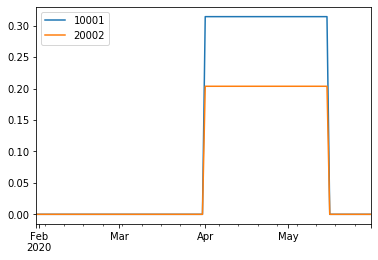

In [2]:
npi = NPI.NPIBase.execute(npi_config=s.npi_config, global_config=config, geoids=s.spatset.nodenames)
npi.getReduction("r0").T.plot()
npi.writeReductions(f"{s.paramdir}{'lol'}.snpi", "parquet")

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


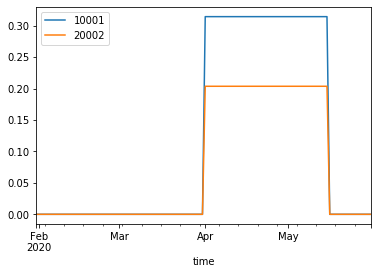

In [3]:
fname = f"{s.paramdir}{'lol'}.snpi"
extension = 'parquet'
in_df = pa.parquet.read_table(f"{fname}.{extension}").to_pandas()
npi = NPI.NPIBase.execute(npi_config=s.npi_config, global_config=config, geoids=s.spatset.nodenames, in_df = in_df)
npi.getReduction("r0").T.plot()

In [3]:
npi = NPI.NPIBase.load(f"{s.paramdir}{'lol'}.snpi", "parquet", npi_config=s.npi_config, global_config=config, geoids=s.spatset.nodenames)
npi.getReduction("r0").T.plot()
npi.writeReductions(f"{s.paramdir}{'lol'}.snpi", "parquet")


TypeError: load() takes 0 positional arguments but 2 positional arguments (and 3 keyword-only arguments) were given

In [17]:
fname = f"model_parameters/minimal_Scenario1/lol.snpi"
extension = 'parquet'
pars = pq.read_table(f"{fname}.{extension}").to_pandas()
pars

,time,10001,20002,parameter,npi_name
0,2020-01-31,0.0,0.0,r0,Wuhan
1,2020-02-01,0.0,0.0,r0,Wuhan
2,2020-02-02,0.0,0.0,r0,Wuhan
3,2020-02-03,0.0,0.0,r0,Wuhan
4,2020-02-04,0.0,0.0,r0,Wuhan
...,...,...,...,...,...
239,2020-05-27,0.0,0.0,r0,None
240,2020-05-28,0.0,0.0,r0,None
241,2020-05-29,0.0,0.0,r0,None
242,2020-05-30,0.0,0.0,r0,None


In [24]:
pars[pars['npi_name'] == 'Wuhan']

,time,10001,20002,parameter,npi_name
0,2020-01-31,0.0,0.0,r0,Wuhan
1,2020-02-01,0.0,0.0,r0,Wuhan
2,2020-02-02,0.0,0.0,r0,Wuhan
3,2020-02-03,0.0,0.0,r0,Wuhan
4,2020-02-04,0.0,0.0,r0,Wuhan
...,...,...,...,...,...
117,2020-05-27,0.0,0.0,r0,Wuhan
118,2020-05-28,0.0,0.0,r0,Wuhan
119,2020-05-29,0.0,0.0,r0,Wuhan
120,2020-05-30,0.0,0.0,r0,Wuhan


In [8]:
in_df[in_df['npi_name'] == 'Wuhan']

,time,10001,20002,parameter,npi_name
0,2020-01-31,0.0,0.0,r0,Wuhan
1,2020-02-01,0.0,0.0,r0,Wuhan
2,2020-02-02,0.0,0.0,r0,Wuhan
3,2020-02-03,0.0,0.0,r0,Wuhan
4,2020-02-04,0.0,0.0,r0,Wuhan
...,...,...,...,...,...
117,2020-05-27,0.0,0.0,r0,Wuhan
118,2020-05-28,0.0,0.0,r0,Wuhan
119,2020-05-29,0.0,0.0,r0,Wuhan
120,2020-05-30,0.0,0.0,r0,Wuhan


In [2]:
seir.onerun_SEIR(1,s)

1

In [3]:
seir.onerun_SEIR_from_draw(500,s,1)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,comp,10001,20002,time
2020-01-31,S,1000.0,2000.0,2020-01-31
2020-01-31,E,0.0,0.0,2020-01-31
2020-01-31,I1,0.0,0.0,2020-01-31
2020-01-31,I2,0.0,0.0,2020-01-31
2020-01-31,I3,0.0,0.0,2020-01-31
...,...,...,...,...
2020-05-31,I2,0.0,0.0,2020-05-31
2020-05-31,I3,0.0,1.0,2020-05-31
2020-05-31,R,908.0,1831.0,2020-05-31
2020-05-31,cumI,908.0,1832.0,2020-05-31
